In [10]:
import import_ipynb
from micrograd import Value
from graphviz import Digraph
from neural_net import Neuron, Layer, MLP

In [11]:
# code to create "Expression Graph" of the loss functions

# builds a set of all nodes and edges in a graph
def trace(root):
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for creator in v.inputs:
        edges.add((creator, v))
        build(creator)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # direction of the graph :LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    # unique id for each node
    uid = str(id(n))
    
    # for any value/node in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n.oper:
      # if this value is a result of some operation, create an op node for it - this not an actual node in the graph
      dot.node(name = uid + n.oper, label = n.oper)
      # and connect this node to it
      dot.edge(uid + n.oper, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2.oper)

  return dot

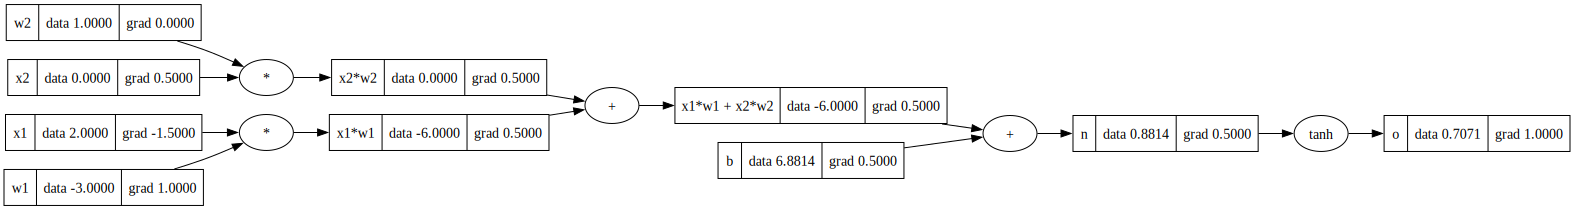

In [12]:
# exmaple 1
# forward pass
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

# backward pass
o.backward_pass()
draw_dot(o)

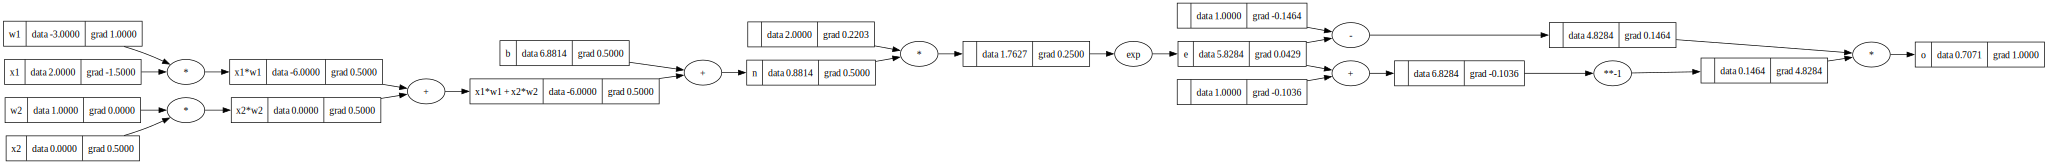

In [13]:
# example 2
# forward pass
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# tanh
e = (2*n).exp(); e.label='e'
o = (e-1)/(e+1); o.label='o'

# backward pass
o.backward_pass()

draw_dot(o)

In [15]:
n=MLP(3,[4,4,1])

In [16]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [17]:
for k in range(1000):
    # forward pass
    y_pred = [n(x) for x in xs]
    loss = sum((yt-ya)**2 for yt,ya in zip(ys,y_pred))
    
    # backward pass
    for paras in n.parameters(): 
        paras.grad=0.0 # before calculating gradient for all parameters, set it to 0 
    loss.backward_pass()
    
    # optimization and update
    for paras in n.parameters():
        paras.data+=-0.05*paras.grad

In [18]:
y_pred

[(Value=0.992679962812008),
 (Value=-0.9902072285019778),
 (Value=-0.9892548268014238),
 (Value=0.989545414103486)]